<a href="https://colab.research.google.com/github/lisatwyw/data-gym/blob/master/SICD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oveview #

Getting started to ECG analyses using data from [medRxiv 2020](https://www.medrxiv.org/content/10.1101/19009175v1), which was a study on predicting subcutaneous implantable cardioverter-defibrillator (SICD) eligibility in adult congenital heart disease using **15-lead ECG**.


## A) Mount and create subfolder ##

In [1]:
from google.colab import drive
drive.mount('/content/drive')

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
if os.path.isdir('/content/drive/My Drive/Colab Notebooks/opensource_datasets/' )==False:
  try:
    ! mkdir '/content/drive/My Drive/Colab Notebooks/opensource_datasets/'
  except e as Exception:
    pass  

if os.path.isdir( '/content/drive/My Drive/Colab Notebooks/opensource_datasets/S-ICD' )==False:
  try:
    ! mkdir '/content/drive/My Drive/Colab Notebooks/opensource_datasets/S-ICD'
  except e as Exception:
    pass  
    
os.chdir('/content/drive/My Drive/Colab Notebooks/opensource_datasets/S-ICD')

## B) Download data and unzip ##
### ...ECG ###

In [7]:
! wget -O 1.zip https://github.com/Tereshchenkolab/S-ICD_eligibility/raw/master/deidentified%2015-lead%20ecg%20txt%20files%201-50.zip
! wget -O 51.zip https://github.com/Tereshchenkolab/S-ICD_eligibility/raw/master/deidentified%2015-lead%20ecg%20txt%20files%2051-101.zip

--2020-05-02 01:23:45--  https://github.com/Tereshchenkolab/S-ICD_eligibility/raw/master/deidentified%2015-lead%20ecg%20txt%20files%2051-101.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Tereshchenkolab/S-ICD_eligibility/master/deidentified%2015-lead%20ecg%20txt%20files%2051-101.zip [following]
--2020-05-02 01:23:45--  https://raw.githubusercontent.com/Tereshchenkolab/S-ICD_eligibility/master/deidentified%2015-lead%20ecg%20txt%20files%2051-101.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18528128 (18M) [application/zip]
Saving to: ‘51.zip’

51.zip              100%[==================

In [13]:
! unzip 1.zip -d part1
! unzip 51.zip -d part2


Archive:  51.zip
  inflating: part2/deidentified 15-lead ecg txt files 51-101/100_L_Stand.txt  
  inflating: part2/deidentified 15-lead ecg txt files 51-101/100_L_Supine.txt  
  inflating: part2/deidentified 15-lead ecg txt files 51-101/100_R_Stand.txt  
  inflating: part2/deidentified 15-lead ecg txt files 51-101/100_R_Supine.txt  
  inflating: part2/deidentified 15-lead ecg txt files 51-101/101_L_Stand.txt  
  inflating: part2/deidentified 15-lead ecg txt files 51-101/101_L_Sup.txt  
  inflating: part2/deidentified 15-lead ecg txt files 51-101/101_R_Stand.txt  
  inflating: part2/deidentified 15-lead ecg txt files 51-101/101_R_Sup.txt  
  inflating: part2/deidentified 15-lead ecg txt files 51-101/51_L_Stand.txt  
  inflating: part2/deidentified 15-lead ecg txt files 51-101/51_L_Supine.txt  
  inflating: part2/deidentified 15-lead ecg txt files 51-101/51_R_Stand.txt  
  inflating: part2/deidentified 15-lead ecg txt files 51-101/51_R_Supine.txt  
  inflating: part2/deidentified 15-lead

In [21]:
os.chdir('/content/drive/My Drive/Colab Notebooks/opensource_datasets/S-ICD/part2/deidentified 15-lead ecg txt files 51-101')
import pandas as pd
import glob
files = glob.glob('*txt') 
len(files)

! ls * 

# 4 positions

100_L_Stand.txt   61_R_Supine.txt    74_R_Stand.txt   87_L_Supine.txt
100_L_Supine.txt  62_L_Standing.txt  74_R_Supine.txt  87_R_Stand.txt
100_R_Stand.txt   62_L_Supine.txt    75_L_Stand.txt   87_R_Supine.txt
100_R_Supine.txt  62_R_Standing.txt  75_L_Supine.txt  88_L_Stand.txt
101_L_Stand.txt   62_R_Supine.txt    75_R_Stand.txt   88_L_Supine.txt
101_L_Sup.txt	  63_L_Stand.txt     75_R_Supine.txt  88_R_Stand.txt
101_R_Stand.txt   63_L_Supine.txt    76_L_Stand.txt   88_R_Supine.txt
101_R_Sup.txt	  63_R_Stand.txt     76_L_Supine.txt  89_L_Stand.txt
51_L_Stand.txt	  63_R_Supine.txt    76_R_Stand.txt   89_L_Supine.txt
51_L_Supine.txt   64_L_Stand.txt     76_R_Supine.txt  89_R_Stand.txt
51_R_Stand.txt	  64_L_Supine.txt    77_L_Stand.txt   89_R_Supine.txt
51_R_Supine.txt   64_R_Stand.txt     77_L_Supine.txt  90_L_Stand.txt
52_L_Stand.txt	  64_R_Supine.txt    77_R_Stand.txt   90_L_Supine.txt
52_L_Supine.txt   65_L_Stand.txt     77_R_Supine.txt  90_R_Stand.txt
52_R_Stand.txt	  65_L_Supine.txt  

In [40]:
df = pd.read_csv(files[0],sep=" ",header=2)
df.shape


(4998, 16)

In [42]:
df.head()


,-527,-624,-97,575,-214,-361,-273,29,-87,644,-185,751,878,478,87,Unnamed: 15
0,-527,-624,-97,575,-214,-361,-273,29,-87,644,-185,751,878,478,87,NaN
1,-527,-624,-97,575,-214,-361,-273,29,-87,644,-185,751,878,478,87,NaN
2,-527,-624,-97,575,-214,-361,-253,48,-73,644,-195,736,868,473,107,NaN
3,-527,-624,-97,575,-214,-361,-244,58,-68,644,-195,732,858,468,117,NaN
4,-527,-624,-97,575,-214,-361,-234,68,-63,644,-195,727,849,463,126,NaN


In [61]:
print( files[1], files[2].split('.txt')[0])

100_L_Supine.txt 100_R_Stand


100_L_Stand
100_L_Stand
100_L_Stand
100_L_Stand
100_L_Stand
100_L_Stand
100_L_Stand
100_L_Stand
100_L_Stand
100_L_Stand
100_L_Stand
100_L_Stand
100_L_Stand
100_L_Stand
100_L_Stand
100_L_Supine
100_L_Supine


IndexError: ignored

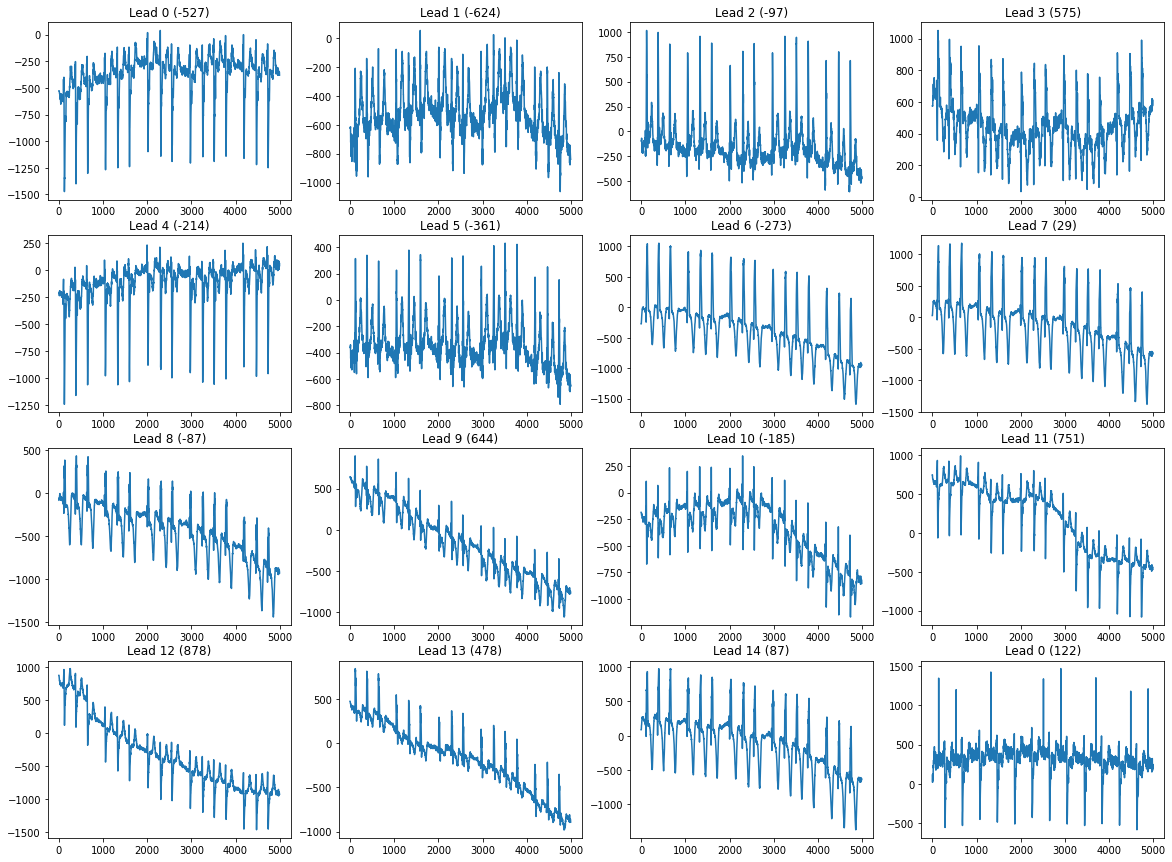

In [65]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=( 20, 15 ))  
nps2= 4
axes=fig.subplots(4,nps2)  
a=b=-1
for f in range(4):
  df = pd.read_csv(files[f],sep=" ",header=2)

  for i in range(15):
    b+=1       
    if (b % ( nps2 ) ) == 0:
        a+=1; b=0   

    e= df.columns[i]
    name=files[f].split('.txt')[0] 
    print(name)
    axes[a,b].plot(df[e], label=name)
    axes[a,b].set_title('Lead %d (%s)' % (i,e) )
fig.suptitle( files[0][:3] )